In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [2]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [10]:
philips_straighter = pd.read_csv('Philips_Straightening_Brush.csv')
philips_straighter.head(3)

,id,profileName,text,date,title,rating,images,Design
0,R20HPZ87FKCDOE,Hinita,\n I would genuinely recommend this product i...,Reviewed in India on 21 August 2019,Naturally straight hair,5,https://images-na.ssl-images-amazon.com/images...,Straightening Brush
1,R9SE00QJAK0UM,Sree,\n The plug was of cheap quality. I had great...,Reviewed in India on 7 July 2019,Low quality plug,3,NaN,Straightening Brush
2,R2IXGNA4AEBM30,garima,\n My hair generally becomes frizzy after 1 d...,Reviewed in India on 10 June 2019,Easy to use. Wonderful results.,5,NaN,Straightening Brush


In [11]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(philips_straighter.text))
sentences[5:15] 

['All you have to do is run this brush over your hair - wet or dry to get smooth naturally straight hair, due to the large brush with three layers of bristles it even helps detangle your hair.',
 'It comes with keratin protection which ensures that your hair is not damaged by the heat.',
 'It takes only a few minutes for it to run through your hair and keep it looking smooth, frizz free and straight.',
 'I really love the ease and the frizz free effect it has on my hair.',
 'It comes with an LeD light which shines to let you know that it is working or is ready for use.',
 'It feels like you are just brushing your hair.',
 'It doesn’t overheat and damage your hair, the brush is heated uniformly as well.',
 'I would say go for it if you have less time and want frizz free and naturally looking straight hair, it’s a good product to have on your dressing table\n \n  The plug was of cheap quality.',
 'I had great difficulty to keep the plug in the socket.. Half the time the machine will not 

In [12]:
Philips_df = pd.DataFrame(sentences, columns=['sentence'])
Philips_df 

,sentence
0,\n I would genuinely recommend this product i...
1,Your hair doesn’t look like that horrible parl...
2,It comes with a plug point and an easy to use ...
3,Where the temperature of 2 is 200 degree and 1...
4,You can adjust as per your liking.
...,...
2004,I didn't notice hairfall too wch is very grt.
2005,I think this is a must in every woman's closet.
2006,"Temperature control, easy to use, warmth good,..."
2007,Give 5stars.


In [13]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [14]:
calculate_sentiment(text = 'amazing') 

4

In [15]:
#calculate_sentiment(text = 'beautiful') 

3

In [17]:
#calculate_sentiment(text = 'very poor') 

-2

In [18]:
Philips_df['sentiment_value'] = Philips_df['sentence'].apply(calculate_sentiment) 

In [19]:
Philips_df['word_count'] = Philips_df['sentence'].str.split().apply(len)
Philips_df['word_count'].head(10) 

0    31
1    10
2    22
3    13
4     7
5    38
6    16
7    22
8    15
9    21
Name: word_count, dtype: int64

In [20]:
Philips_df

,sentence,sentiment_value,word_count
0,\n I would genuinely recommend this product i...,3,31
1,Your hair doesn’t look like that horrible parl...,-1,10
2,It comes with a plug point and an easy to use ...,1,22
3,Where the temperature of 2 is 200 degree and 1...,0,13
4,You can adjust as per your liking.,0,7
...,...,...,...
2004,I didn't notice hairfall too wch is very grt.,0,9
2005,I think this is a must in every woman's closet.,0,10
2006,"Temperature control, easy to use, warmth good,...",6,10
2007,Give 5stars.,0,2


In [21]:
Philips_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
1796,😍💜😇👍\n \n Good oh I mean gorgeous\n \n Highl...,26,49
787,It’s actually really good this product is a sa...,29,91
1329,Just go for it it really too good value of mon...,30,70
1605,First of all delivery is very nice and product...,31,112
1678,Love it totally I have curly hair so it take m...,33,53
1776,Yeah good product but price so high\n \n Mone...,42,79
1422,stopped working in less than 15 days\n \n Awe...,46,65
1786,Easy to use👍\n \n Nice\n \n Really good\n \n...,50,80
1619,Perfect straightening in 5mins\n \n Good but ...,58,130
1805,Osame\n \n Amazing Product\n \n Good product...,99,119


In [22]:
Philips_df['sentiment_value'].describe() 

count    2009.000000
mean        2.512195
std         5.123376
min       -10.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: sentiment_value, dtype: float64

In [23]:
Philips_df[Philips_df['sentiment_value']<=0] 

,sentence,sentiment_value,word_count
1,Your hair doesn’t look like that horrible parl...,-1,10
3,Where the temperature of 2 is 200 degree and 1...,0,13
4,You can adjust as per your liking.,0,7
6,It comes with keratin protection which ensures...,-2,16
9,It comes with an LeD light which shines to let...,0,21
...,...,...,...
1990,There is problem in cord.,-2,5
1998,Your hair doesn’t look like that horrible parl...,-1,10
2004,I didn't notice hairfall too wch is very grt.,0,9
2005,I think this is a must in every woman's closet.,0,10


In [24]:
Philips_df[Philips_df['sentiment_value']>=10] 

,sentence,sentiment_value,word_count
124,No hair burn smell..Easy to use.. No help requ...,11,36
225,"It is a wonderful product, comes with a broad ...",11,68
231,My hair texture is wavey and thin and long hai...,16,109
287,If you like straight hair without the fuss of ...,14,58
346,U will ready with your straighten hair... A .m...,16,94
...,...,...,...
1886,If u need to get ready like asap this is the b...,10,67
1899,My wife just loved the gift...\n \n Really it...,10,40
1958,Must order and amazing for this price range\n ...,11,63
1966,I wish to return it back\n \n So this gives t...,11,91


In [26]:
Philips_df[Philips_df['sentiment_value']>=50] 

,sentence,sentiment_value,word_count
1619,Perfect straightening in 5mins\n \n Good but ...,58,130
1786,Easy to use👍\n \n Nice\n \n Really good\n \n...,50,80
1805,Osame\n \n Amazing Product\n \n Good product...,99,119


In [27]:
Philips_df['index']=range(0,len(Philips_df)) 

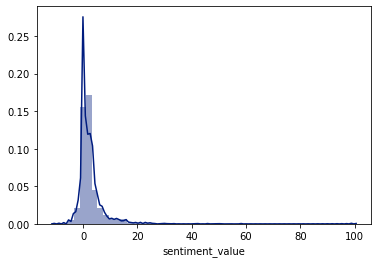

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("dark")
sns.distplot(Philips_df['sentiment_value'],color='b')

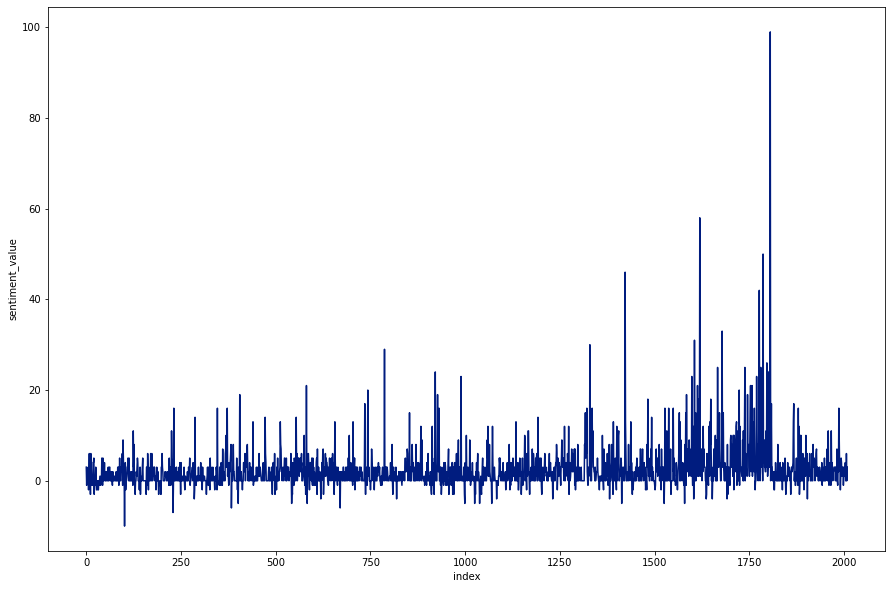

In [34]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=Philips_df,color='b') 

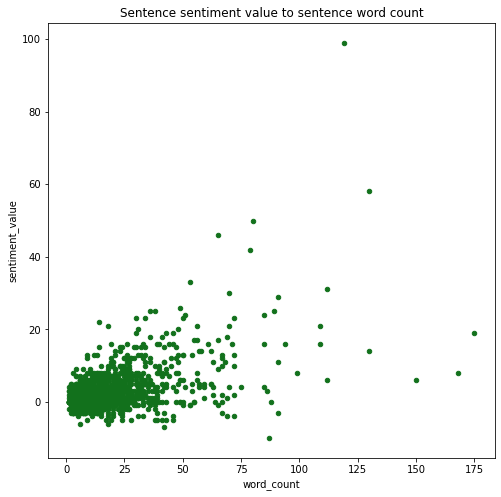

In [36]:
Philips_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count',color='g')